In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
works = pd.read_csv('../data/works.csv')
tags = pd.read_csv('../data/tags.csv')

def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")


def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [3]:
sw_tag = tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False).head(20)['id'].values[12]

In [4]:
sw_works = works.loc[works['tags'].astype('string').str.contains(str(sw_tag))]

In [5]:
sw_works['year'] = sw_works['creation date'].str[:4]
sw_works['month'] = sw_works['creation date'].str[5:7]
sw_works['sm_date'] = sw_works['creation date'].str[0:7]
sw_works.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_10740\1024755958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_works['year'] = sw_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_10740\1024755958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_works['month'] = sw_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_10740\1024755958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
7262047,2009-11-14,en,False,True,1316.0,14+24+16405+16406+4682+11+2100+29577+1160+101375,NaN,2009,11,2009-11
7252254,2009-11-24,en,False,True,651.0,11+23+14+29577+30928+9938+640+10818+15675+101375,NaN,2009,11,2009-11
7253304,2009-11-22,en,False,True,945.0,23+6779+640+639+16+11+28810+18154+29577+101375,NaN,2009,11,2009-11
7253310,2009-11-22,en,False,True,3702.0,11+21+16+28839+28838+127958+101375+1012+36088+...,NaN,2009,11,2009-11
7256318,2009-11-18,en,False,True,1579.0,21+16+24199+24200+11+101375+313264,NaN,2009,11,2009-11
...,...,...,...,...,...,...,...,...,...,...
106860,2021-02-09,en,False,True,6180.0,11+101375+754222+3180+754171+933719+821830+976...,NaN,2021,02,2021-02
106809,2021-02-09,en,False,True,1111.0,13+101375+30105134+53860254+15929+10985+11601+...,NaN,2021,02,2021-02
106787,2021-02-09,en,False,True,1127.0,10+31803664+101375+31340635+47886517+53860095+...,NaN,2021,02,2021-02
105553,2021-02-09,en,False,True,1638.0,10+101375+29577+15914+640+4682+64570+13412+116...,NaN,2021,02,2021-02


In [6]:
sw_sm_dates = sw_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

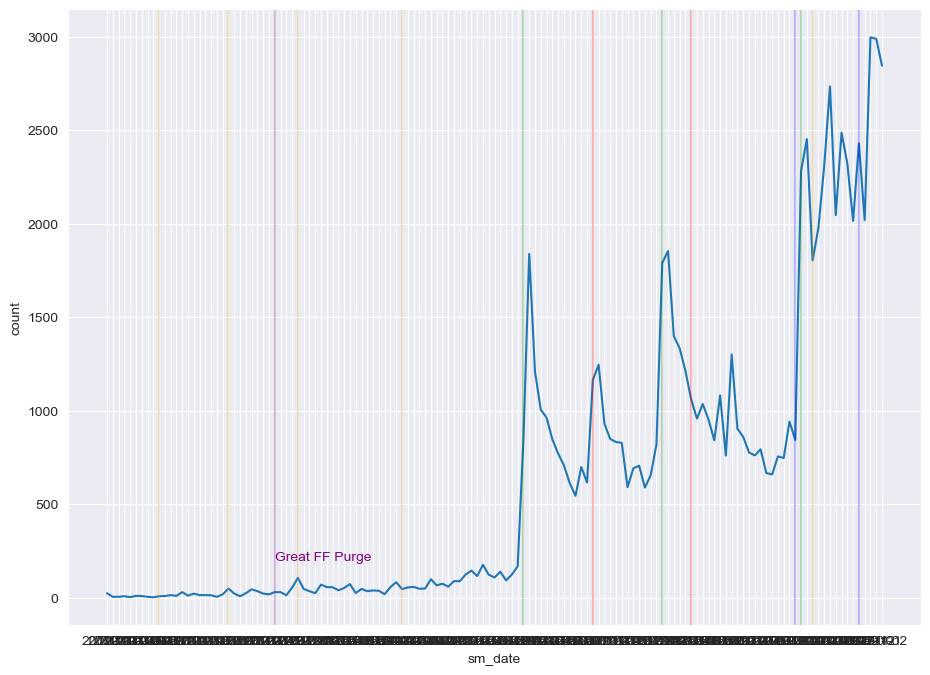

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=sw_sm_dates, x=sw_sm_dates['sm_date'], y=sw_sm_dates['count'])
plt.axvline(x='2015-12', color='green', alpha=0.25)
plt.axvline(x='2017-12', color='green', alpha=0.25)
plt.axvline(x='2019-12', color='green', alpha=0.25)
plt.axvline(x='2016-12', color='red', alpha=0.25)
plt.axvline(x='2018-05', color='red', alpha=0.25)
plt.axvline(x='2010-09', color='goldenrod', alpha=0.25)
plt.axvline(x='2011-09', color='goldenrod', alpha=0.25)
plt.axvline(x='2012-09', color='goldenrod', alpha=0.25)
plt.axvline(x='2014-03', color='goldenrod', alpha=0.25)
plt.axvline(x='2020-02', color='goldenrod', alpha=0.25)
plt.axvline(x='2019-11', color='blue', alpha=0.25)
plt.axvline(x='2020-10', color='blue', alpha=0.25)
plt.axvline('2012-05', color='purple', label='Great FF Purge', alpha=0.25)
plt.text(x = '2012-05', y = 200, s = 'Great FF Purge', color = 'purple')
#plt.annotate('Great FF Purge', xy = ('2012-05', 100))
plt.show()

In [8]:
sw_works.head()

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
95,2021-02-26,en,False,True,612.0,10+101375+747342+22801899+25855299+267347+3209...,NaN,2021,02,2021-02
220,2021-02-26,en,False,True,2646.0,13+31516237+101375+6730510+28343978+3180+53383...,NaN,2021,02,2021-02
278,2021-02-26,en,False,False,3428.0,11+6048501+101375+7782136+3178+11601+5052709+5...,NaN,2021,02,2021-02
296,2021-02-26,en,False,False,1509.0,11+101375+106880+825854+144918+640+754089+3555...,NaN,2021,02,2021-02
436,2021-02-26,en,False,True,603.0,10+101375+747342+29577+8602336+10818+11649+142...,NaN,2021,02,2021-02


In [9]:
sw_works['complete'].value_counts()

complete
True     65789
False    18190
Name: count, dtype: int64

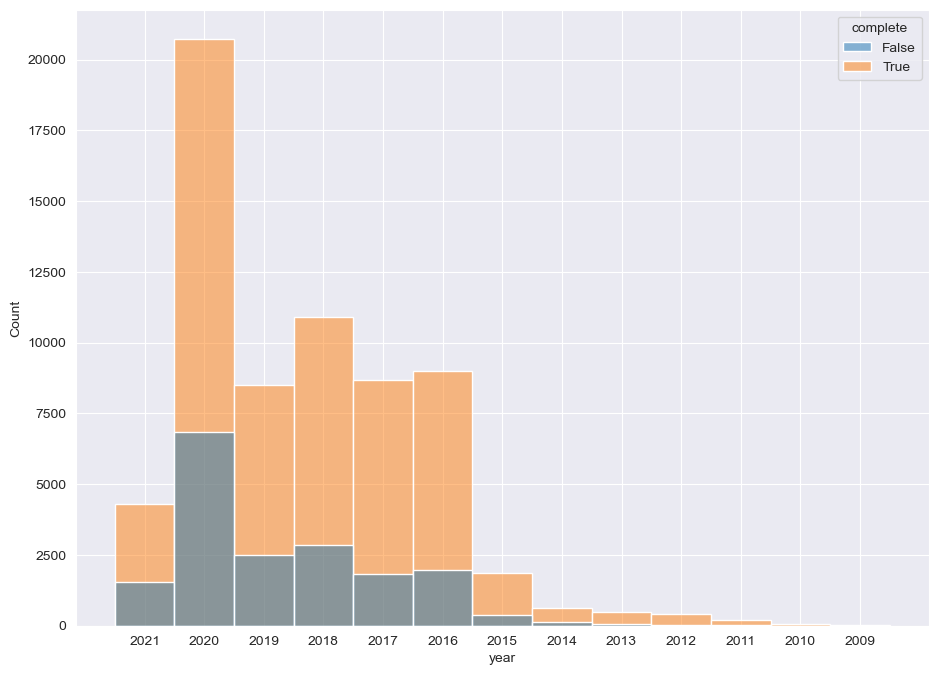

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.histplot(data=sw_works, x=sw_works['year'], hue=sw_works['complete'])
plt.show()

In [11]:
sw_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
95,2021-02-26,en,False,True,612.0,10+101375+747342+22801899+25855299+267347+3209...,NaN,2021,02,2021-02
220,2021-02-26,en,False,True,2646.0,13+31516237+101375+6730510+28343978+3180+53383...,NaN,2021,02,2021-02
278,2021-02-26,en,False,False,3428.0,11+6048501+101375+7782136+3178+11601+5052709+5...,NaN,2021,02,2021-02
296,2021-02-26,en,False,False,1509.0,11+101375+106880+825854+144918+640+754089+3555...,NaN,2021,02,2021-02
436,2021-02-26,en,False,True,603.0,10+101375+747342+29577+8602336+10818+11649+142...,NaN,2021,02,2021-02
...,...,...,...,...,...,...,...,...,...,...
7262043,2009-11-14,en,False,True,516.0,9+14+29577+101375,NaN,2009,11,2009-11
7262044,2009-11-14,en,False,True,1834.0,14+24+16405+16407+16406+10985+10+2100+29576+10...,NaN,2009,11,2009-11
7262045,2009-11-14,en,False,True,1542.0,14+24+16405+16406+16407+11+2100+13506+29576+10...,NaN,2009,11,2009-11
7262046,2009-11-14,en,False,True,527.0,14+24+16443+16405+3185+16406+4850+12+786+2100+...,NaN,2009,11,2009-11


In [12]:
tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains('Star Wars'))].sort_values(by='cached_count', ascending=False).head(10)

,id,type,name,canonical,cached_count,merger_id
70169,101375,Fandom,Star Wars - All Media Types,True,96000,NaN
2077328,6048501,Fandom,Star Wars Sequel Trilogy,True,43778,NaN
1925344,5407051,Fandom,Star Wars Episode VII: The Force Awakens (2015),False,28643,6048501.0
535,641,Fandom,Star Wars,False,22019,101375.0
486025,747342,Fandom,Star Wars: The Clone Wars (2008) - All Media T...,True,21336,NaN
23012,29577,Fandom,Star Wars Prequel Trilogy,True,19166,NaN
23011,29576,Fandom,Star Wars Original Trilogy,True,11109,NaN
2827778,9162187,Fandom,Rogue One: A Star Wars Story (2016),True,9422,NaN
1393746,3132749,Fandom,Star Wars: Rebels,True,7292,NaN
1418323,3235649,Fandom,Star Wars Legends - All Media Types,True,3953,NaN


In [13]:
sql_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains('Star Wars'))].sort_values(by='cached_count', ascending=False).head(10)['id'].values[1]

In [14]:
sql_works = works.loc[works['tags'].astype('string').str.contains(str(sql_tag))]

In [15]:
sql_works['sm_date'] = sql_works['creation date'].astype('string').str[0:7]
sql_works

C:\Users\isiyb\AppData\Local\Temp\ipykernel_10740\2142224040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sql_works['sm_date'] = sql_works['creation date'].astype('string').str[0:7]


,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,sm_date
278,2021-02-26,en,False,False,3428.0,11+6048501+101375+7782136+3178+11601+5052709+5...,NaN,2021-02
573,2021-02-26,en,False,False,2105.0,11+6048501+7782136+7561277+5524551+5524491+505...,NaN,2021-02
611,2021-02-26,en,False,True,7461.0,13+6048501+7574276+7782136+7689124+7598075+552...,NaN,2021-02
613,2021-02-26,en,False,False,9175.0,12+101375+6048501+7564880+7564901+10017553+331...,NaN,2021-02
853,2021-02-26,en,False,False,2917.0,13+101375+6048501+7782136+5524551+7561277+9103...,NaN,2021-02
...,...,...,...,...,...,...,...,...
5650685,2015-08-06,en,False,True,1356.0,10+14+101375+29576+10985+6048501+595882+21,NaN,2015-08
6503143,2013-10-04,en,False,False,331029.0,22+204497+4622+133172+4625+51731+35113+432060+...,NaN,2013-10
6591231,2013-07-02,en,False,True,100803.0,12+22+23+2246+14+116304+27+14082+4363+264778+5...,NaN,2013-07
6655022,2013-04-30,en,False,False,90416.0,21+16+5178+19877+36380+8136+42173+727010+12624...,NaN,2013-04


In [16]:
sql_sm_dates = sql_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()
sql_sm_dates

,sm_date,count
0,2012-10,1
1,2013-04,1
2,2013-07,1
3,2013-10,1
4,2015-08,3
...,...,...
64,2020-10,1141
65,2020-11,861
66,2020-12,1258
67,2021-01,1150


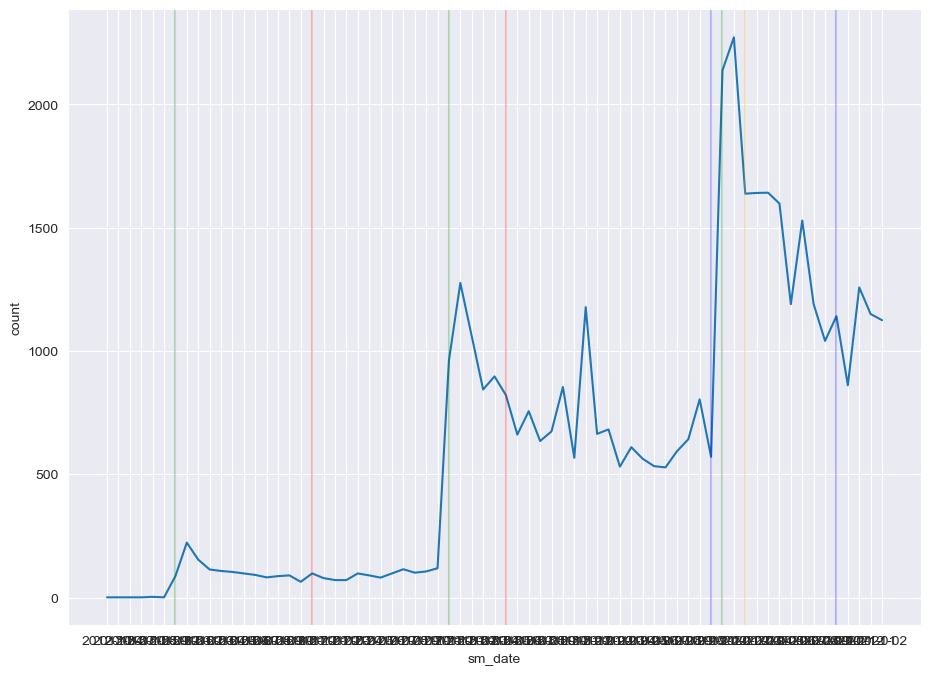

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=sql_sm_dates, x=sql_sm_dates['sm_date'], y=sql_sm_dates['count'])
plt.axvline(x='2015-12', color='green', alpha=0.25)
plt.axvline(x='2017-12', color='green', alpha=0.25)
plt.axvline(x='2019-12', color='green', alpha=0.25)
plt.axvline(x='2016-12', color='red', alpha=0.25)
plt.axvline(x='2018-05', color='red', alpha=0.25)
plt.axvline(x='2020-02', color='goldenrod', alpha=0.25)
plt.axvline(x='2019-11', color='blue', alpha=0.25)
plt.axvline(x='2020-10', color='blue', alpha=0.25)
#plt.annotate('Great FF Purge', xy = ('2012-05', 100))
plt.show()